In [1]:
from common import colors, fliersize

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [3]:
import pickle

import re
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from scipy import stats
from ezephys import pltools
from statannot import add_stat_annotation

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_benchmarks')
MOD_PATH = os.path.join('data', 'models')

# Benchmarks

In [5]:
def strip_string_from_col_names(dframe, string):
    newdframe = dframe.rename(columns=lambda x: re.sub(string, '', x))
    return newdframe

In [6]:
benchmarks = {}

for celltype in ['5HT', 'GABA', 'mPFC']:
    try:
        benchmarks[celltype] = {}
        for benchtype in ['Md_8', 'R2_V', 'R2_dV']:
            benchmarks[celltype][benchtype] = pd.read_csv(
                os.path.join(MOD_PATH, celltype, '{}_goodcellsbenchmark_{}.csv'.format(celltype, benchtype))
            )
            minified_bench = pd.read_csv(
                os.path.join(MOD_PATH, celltype, '{}_minified_goodcellsbenchmark_{}.csv'.format(celltype, benchtype))
            )
            benchmarks[celltype][benchtype]['minified'] = False
            minified_bench = strip_string_from_col_names(minified_bench, '_minified')
            minified_bench['minified'] = True
            benchmarks[celltype][benchtype] = benchmarks[celltype][benchtype].append(minified_bench, ignore_index=True)
    except IOError:
        warnings.warn('IOError trying to collect {} benchmarks. Skipping.'.format(celltype))

del minified_bench

# Md* benchmarks

## mPFC

In [7]:
piv = benchmarks['mPFC']['Md_8'].melt(
    value_vars=['mPFC_AugmentedGIFs', 'mPFC_GIFs', 'mPFC_iGIF_NPs', 'mPFC_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='Md_8'
)

In [8]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).mean()

Md_8
model              minified          
mPFC_AugmentedGIFs False     0.742810
                   True      0.786175
mPFC_GIFs          False     0.783230
                   True      0.837471
mPFC_iGIF_NPs      False     0.826567
                   True      0.844779
mPFC_iGIF_VRs      False     0.830021
                   True      0.875549

In [9]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).sem()

Md_8
model              minified          
mPFC_AugmentedGIFs False     0.067857
                   True      0.072698
mPFC_GIFs          False     0.050724
                   True      0.042026
mPFC_iGIF_NPs      False     0.054952
                   True      0.068439
mPFC_iGIF_VRs      False     0.053951
                   True      0.064730

In [10]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).std()

Md_8
model              minified          
mPFC_AugmentedGIFs False     0.179532
                   True      0.192341
mPFC_GIFs          False     0.134202
                   True      0.111191
mPFC_iGIF_NPs      False     0.145390
                   True      0.153035
mPFC_iGIF_VRs      False     0.142741
                   True      0.158555

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.102e-01 stat=7.000e+00
('Using zero_method ', 'pratt')
mPFC_AugmentedGIFs v.s. mPFC_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.889e-01 stat=3.000e+00
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.889e-01 stat=3.000e+00


/miniconda3/envs/neopozz/lib/python2.7/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


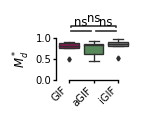

In [11]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs', 'mPFC_iGIF_NPs'],
    palette=[colors['gif'], colors['agif'], colors['igif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :],
    loc='outside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs', 'mPFC_iGIF_NPs'],
    box_pairs=[
        ('mPFC_GIFs', 'mPFC_AugmentedGIFs'),
        ('mPFC_GIFs', 'mPFC_iGIF_NPs'),
        ('mPFC_AugmentedGIFs', 'mPFC_iGIF_NPs')
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1, 2], ['GIF', 'aGIF', 'iGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$M_d^*$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.35, bottom=0.25, top=0.6, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_md_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_md_benchmark.svg'))

## 5HT

In [12]:
piv = benchmarks['5HT']['Md_8'].melt(
    value_vars=['5HT_AugmentedGIFs', '5HT_GIFs', '5HT_iGIF_NPs', '5HT_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='Md_8'
)

/miniconda3/envs/neopozz/lib/python2.7/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/miniconda3/envs/neopozz/lib/python2.7/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [13]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).mean()

Md_8
model             minified          
5HT_AugmentedGIFs False     0.481038
                  True      0.494719
5HT_GIFs          False     0.352106
                  True      0.408773
5HT_iGIF_NPs      False     0.536271
                  True      0.617994
5HT_iGIF_VRs      False          NaN
                  True           NaN

In [14]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).sem()

Md_8
model             minified          
5HT_AugmentedGIFs False     0.034982
                  True      0.056593
5HT_GIFs          False     0.027866
                  True      0.050351
5HT_iGIF_NPs      False     0.036343
                  True      0.047591
5HT_iGIF_VRs      False          NaN
                  True           NaN

In [15]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).std()

Md_8
model             minified          
5HT_AugmentedGIFs False     0.148417
                  True      0.160068
5HT_GIFs          False     0.118225
                  True      0.142415
5HT_iGIF_NPs      False     0.154189
                  True      0.134608
5HT_iGIF_VRs      False          NaN
                  True           NaN

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.366e-03 stat=5.000e+00
('Using zero_method ', 'pratt')
5HT_AugmentedGIFs v.s. 5HT_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=6.436e-01 stat=5.700e+01
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=5.893e-04 stat=0.000e+00


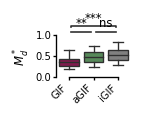

In [16]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['5HT_GIFs', '5HT_AugmentedGIFs', '5HT_iGIF_NPs'],
    palette=[colors['gif'], colors['agif'], colors['igif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :],
    loc='outside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['5HT_GIFs', '5HT_AugmentedGIFs', '5HT_iGIF_NPs'],
    box_pairs=[
        ('5HT_GIFs', '5HT_AugmentedGIFs'),
        ('5HT_GIFs', '5HT_iGIF_NPs'),
        ('5HT_AugmentedGIFs', '5HT_iGIF_NPs')
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1, 2], ['GIF', 'aGIF', 'iGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$M_d^*$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.35, bottom=0.25, top=0.6, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_md_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_md_benchmark.svg'))

## SOM

In [17]:
piv = benchmarks['GABA']['Md_8'].melt(
    value_vars=['GABA_AugmentedGIFs', 'GABA_GIFs', 'GABA_iGIF_NPs', 'GABA_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='Md_8'
)

In [18]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).mean()

Md_8
model              minified          
GABA_AugmentedGIFs False     0.836994
                   True      0.738735
GABA_GIFs          False     0.817607
                   True      0.727547
GABA_iGIF_NPs      False     0.891903
                   True      0.750887
GABA_iGIF_VRs      False     0.888278
                   True      0.732420

In [19]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).sem()

Md_8
model              minified          
GABA_AugmentedGIFs False     0.031627
                   True      0.063896
GABA_GIFs          False     0.039778
                   True      0.065529
GABA_iGIF_NPs      False     0.025140
                   True      0.050712
GABA_iGIF_VRs      False     0.025151
                   True      0.056278

In [20]:
piv.loc[:, ['Md_8', 'minified', 'model']].groupby(['model', 'minified']).std()

Md_8
model              minified          
GABA_AugmentedGIFs False     0.118336
                   True      0.239079
GABA_GIFs          False     0.148837
                   True      0.245186
GABA_iGIF_NPs      False     0.094064
                   True      0.175673
GABA_iGIF_VRs      False     0.094107
                   True      0.186654

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.721e-01 stat=2.800e+01
('Using zero_method ', 'pratt')
GABA_AugmentedGIFs v.s. GABA_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.675e-03 stat=1.000e+00
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_iGIF_NPs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.945e-03 stat=0.000e+00


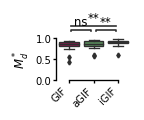

In [21]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['GABA_GIFs', 'GABA_AugmentedGIFs', 'GABA_iGIF_NPs'],
    palette=[colors['gif'], colors['agif'], colors['igif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='Md_8', 
    data=piv.loc[piv['minified'] == False, :],
    loc='outside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['GABA_GIFs', 'GABA_AugmentedGIFs', 'GABA_iGIF_NPs'],
    box_pairs=[
        ('GABA_GIFs', 'GABA_AugmentedGIFs'),
        ('GABA_GIFs', 'GABA_iGIF_NPs'),
        ('GABA_AugmentedGIFs', 'GABA_iGIF_NPs')
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1, 2], ['GIF', 'aGIF', 'iGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$M_d^*$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.35, bottom=0.25, top=0.6, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_md_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_md_benchmark.svg'))

# R^2 benchmarks

## mPFC

In [22]:
piv = benchmarks['mPFC']['R2_V'].melt(
    value_vars=['mPFC_AugmentedGIFs', 'mPFC_GIFs', 'mPFC_iGIF_NPs', 'mPFC_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_V'
)

In [23]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).mean()

R2_V
model              minified          
mPFC_AugmentedGIFs False     0.818404
                   True      0.728409
mPFC_GIFs          False     0.872893
                   True      0.866065
mPFC_iGIF_NPs      False     0.872893
                   True      0.856061
mPFC_iGIF_VRs      False     0.857089
                   True      0.838637

In [24]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).sem()

R2_V
model              minified          
mPFC_AugmentedGIFs False     0.077187
                   True      0.162942
mPFC_GIFs          False     0.038106
                   True      0.041859
mPFC_iGIF_NPs      False     0.038106
                   True      0.059730
mPFC_iGIF_VRs      False     0.040063
                   True      0.048577

In [25]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).std()

R2_V
model              minified          
mPFC_AugmentedGIFs False     0.204217
                   True      0.431105
mPFC_GIFs          False     0.100819
                   True      0.110749
mPFC_iGIF_NPs      False     0.100819
                   True      0.133559
mPFC_iGIF_VRs      False     0.105997
                   True      0.118988

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.096e-01 stat=8.000e+00


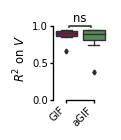

In [26]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs'],
    palette=[colors['gif'], colors['agif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs'],
    box_pairs=[
        ('mPFC_GIFs', 'mPFC_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $V$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_r2_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_r2_benchmark.svg'))

## 5HT

In [27]:
piv = benchmarks['5HT']['R2_V'].melt(
    value_vars=['5HT_AugmentedGIFs', '5HT_GIFs', '5HT_iGIF_NPs', '5HT_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_V'
)

In [28]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).mean()

R2_V
model             minified          
5HT_AugmentedGIFs False     0.896751
                  True      0.881476
5HT_GIFs          False     0.906710
                  True      0.897411
5HT_iGIF_NPs      False     0.906710
                  True      0.897411
5HT_iGIF_VRs      False          NaN
                  True           NaN

In [29]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).sem()

R2_V
model             minified          
5HT_AugmentedGIFs False     0.023156
                  True      0.041765
5HT_GIFs          False     0.015665
                  True      0.025854
5HT_iGIF_NPs      False     0.015665
                  True      0.025854
5HT_iGIF_VRs      False          NaN
                  True           NaN

In [30]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).std()

R2_V
model             minified          
5HT_AugmentedGIFs False     0.098244
                  True      0.118129
5HT_GIFs          False     0.066459
                  True      0.073126
5HT_iGIF_NPs      False     0.066459
                  True      0.073126
5HT_iGIF_VRs      False          NaN
                  True           NaN

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=3.958e-01 stat=6.600e+01


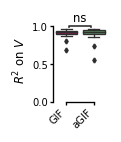

In [31]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['5HT_GIFs', '5HT_AugmentedGIFs'],
    palette=[colors['gif'], colors['agif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['5HT_GIFs', '5HT_AugmentedGIFs'],
    box_pairs=[
        ('5HT_GIFs', '5HT_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $V$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_r2_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_r2_benchmark.svg'))

## SOM

In [32]:
piv = benchmarks['GABA']['R2_V'].melt(
    value_vars=['GABA_AugmentedGIFs', 'GABA_GIFs', 'GABA_iGIF_NPs', 'GABA_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_V'
)

In [33]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).mean()

R2_V
model              minified          
GABA_AugmentedGIFs False     0.944788
                   True      0.945291
GABA_GIFs          False     0.940889
                   True      0.940580
GABA_iGIF_NPs      False     0.940889
                   True      0.936208
GABA_iGIF_VRs      False     0.929410
                   True      0.921114

In [34]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).sem()

R2_V
model              minified          
GABA_AugmentedGIFs False     0.004824
                   True      0.005684
GABA_GIFs          False     0.004800
                   True      0.007562
GABA_iGIF_NPs      False     0.004800
                   True      0.008078
GABA_iGIF_VRs      False     0.007402
                   True      0.012198

In [35]:
piv.loc[:, ['R2_V', 'minified', 'model']].groupby(['model', 'minified']).std()

R2_V
model              minified          
GABA_AugmentedGIFs False     0.018051
                   True      0.021266
GABA_GIFs          False     0.017960
                   True      0.028294
GABA_iGIF_NPs      False     0.017960
                   True      0.027984
GABA_iGIF_VRs      False     0.027695
                   True      0.040457

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=6.404e-02 stat=2.300e+01


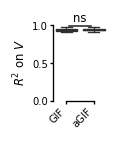

In [36]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['GABA_GIFs', 'GABA_AugmentedGIFs'],
    palette=[colors['gif'], colors['agif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_V', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['GABA_GIFs', 'GABA_AugmentedGIFs'],
    box_pairs=[
        ('GABA_GIFs', 'GABA_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $V$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.9, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_r2_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_r2_benchmark.svg'))

# R^2 dV

## mPFC

In [37]:
piv = benchmarks['mPFC']['R2_dV'].melt(
    value_vars=['mPFC_AugmentedGIFs', 'mPFC_GIFs', 'mPFC_iGIF_NPs', 'mPFC_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_dV'
)

In [38]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).mean()

R2_dV
model              minified          
mPFC_AugmentedGIFs False     0.544341
                   True      0.536354
mPFC_GIFs          False     0.431344
                   True      0.411346
mPFC_iGIF_NPs      False     0.431344
                   True      0.452165
mPFC_iGIF_VRs      False     0.431344
                   True      0.453201

In [39]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).sem()

R2_dV
model              minified          
mPFC_AugmentedGIFs False     0.105752
                   True      0.104668
mPFC_GIFs          False     0.093998
                   True      0.087670
mPFC_iGIF_NPs      False     0.093998
                   True      0.111625
mPFC_iGIF_VRs      False     0.093998
                   True      0.091147

In [40]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).std()

R2_dV
model              minified          
mPFC_AugmentedGIFs False     0.279794
                   True      0.276925
mPFC_GIFs          False     0.248695
                   True      0.231952
mPFC_iGIF_NPs      False     0.248695
                   True      0.249600
mPFC_iGIF_VRs      False     0.248695
                   True      0.223264

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
mPFC_GIFs v.s. mPFC_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=2.771e-02 stat=1.000e+00


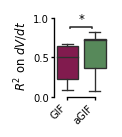

In [41]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_dV', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs'],
    palette=[colors['gif'], colors['agif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_dV', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['mPFC_GIFs', 'mPFC_AugmentedGIFs'],
    box_pairs=[
        ('mPFC_GIFs', 'mPFC_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $dV/dt$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_r2_dV_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'mPFC_r2_dV_benchmark.svg'))

In [42]:
piv = benchmarks['5HT']['R2_dV'].melt(
    value_vars=['5HT_AugmentedGIFs', '5HT_GIFs', '5HT_iGIF_NPs', '5HT_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_dV'
)

In [43]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).mean()

R2_dV
model             minified          
5HT_AugmentedGIFs False     0.300516
                  True      0.228118
5HT_GIFs          False     0.128271
                  True      0.079763
5HT_iGIF_NPs      False     0.128271
                  True      0.079763
5HT_iGIF_VRs      False          NaN
                  True           NaN

In [44]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).sem()

R2_dV
model             minified          
5HT_AugmentedGIFs False     0.047065
                  True      0.048142
5HT_GIFs          False     0.031796
                  True      0.027942
5HT_iGIF_NPs      False     0.031796
                  True      0.027942
5HT_iGIF_VRs      False          NaN
                  True           NaN

In [45]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).std()

R2_dV
model             minified          
5HT_AugmentedGIFs False     0.199680
                  True      0.136167
5HT_GIFs          False     0.134898
                  True      0.079032
5HT_iGIF_NPs      False     0.134898
                  True      0.079032
5HT_iGIF_VRs      False          NaN
                  True           NaN

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
5HT_GIFs v.s. 5HT_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.964e-04 stat=0.000e+00


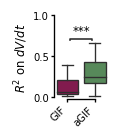

In [46]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_dV', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['5HT_GIFs', '5HT_AugmentedGIFs'],
    palette=[colors['gif'], colors['agif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_dV', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['5HT_GIFs', '5HT_AugmentedGIFs'],
    box_pairs=[
        ('5HT_GIFs', '5HT_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $dV/dt$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.95, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, '5HT_r2_dV_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, '5HT_r2_dV_benchmark.svg'))

## SOM

In [47]:
piv = benchmarks['GABA']['R2_dV'].melt(
    value_vars=['GABA_AugmentedGIFs', 'GABA_GIFs', 'GABA_iGIF_NPs', 'GABA_iGIF_VRs'],
    id_vars=['minified', 'Cell'],
    var_name='model',
    value_name='R2_dV'
)

In [48]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).mean()

R2_dV
model              minified          
GABA_AugmentedGIFs False     0.806027
                   True      0.804244
GABA_GIFs          False     0.600134
                   True      0.602791
GABA_iGIF_NPs      False     0.600134
                   True      0.615192
GABA_iGIF_VRs      False     0.600134
                   True      0.602075

In [49]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).sem()

R2_dV
model              minified          
GABA_AugmentedGIFs False     0.034948
                   True      0.034072
GABA_GIFs          False     0.063708
                   True      0.062941
GABA_iGIF_NPs      False     0.063708
                   True      0.069249
GABA_iGIF_VRs      False     0.063708
                   True      0.074485

In [50]:
piv.loc[:, ['R2_dV', 'minified', 'model']].groupby(['model', 'minified']).std()

R2_dV
model              minified          
GABA_AugmentedGIFs False     0.130763
                   True      0.127485
GABA_GIFs          False     0.238375
                   True      0.235504
GABA_iGIF_NPs      False     0.238375
                   True      0.239885
GABA_iGIF_VRs      False     0.238375
                   True      0.247039

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04
()
('Using zero_method ', 'pratt')
GABA_GIFs v.s. GABA_AugmentedGIFs: Wilcoxon test (paired samples) with Bonferroni correction, P_val=9.815e-04 stat=0.000e+00


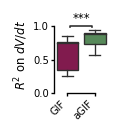

In [51]:
plt.figure(figsize=(0.8, 1))

plt.subplot(111)
ax = sns.boxplot(
    x='model', 
    y='R2_dV', 
    data=piv.loc[piv['minified'] == False, :], 
    order=['GABA_GIFs', 'GABA_AugmentedGIFs'],
    palette=[colors['gif'], colors['agif']],
    fliersize=fliersize
)
add_stat_annotation(
    ax, 
    x='model', 
    y='R2_dV', 
    data=piv.loc[piv['minified'] == False, :],
    loc='inside',
    linewidth=1,
    fontsize=7,
    line_offset=0.3,
    order=['GABA_GIFs', 'GABA_AugmentedGIFs'],
    box_pairs=[
        ('GABA_GIFs', 'GABA_AugmentedGIFs'),
    ],
    comparisons_correction='bonferroni',
    test='Wilcoxon'
)
plt.xticks([0, 1], ['GIF', 'aGIF'], rotation=45, ha='right')
plt.yticks([0, 0.5, 1])
plt.xlabel('')
plt.ylabel('$R^2$ on $dV/dt$')
pltools.hide_border('tr', trim=True)

plt.subplots_adjust(left=0.4, bottom=0.25, top=0.9, right=0.97)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GABA_r2_dV_benchmark.png'))
    plt.savefig(os.path.join(IMG_PATH, 'GABA_r2_dV_benchmark.svg'))